In [1]:
!pip install pennylane numpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.1/56.1 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 930.0/930.0 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 24.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.9/167.9 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 26.7 MB/s eta 0:00:00


In [16]:
import numpy as np
import pennylane as qml

# Define quantum device
dev = qml.device("default.qubit", wires=1, shots=1)

def prepare_qubit(state, basis):
    """Prepare qubit in given state and basis."""
    if basis == "X":
        qml.Hadamard(wires=0)
    if state == 1:
        qml.PauliX(wires=0)

@qml.qnode(dev)
def quantum_transmission(state, basis):
    """Simulate quantum transmission and measurement."""
    prepare_qubit(state, basis)
    if basis == "X":
        qml.Hadamard(wires=0)
    return qml.expval(qml.PauliZ(0))  # Expectation value (-1 or 1)

# Generate random bit sequences
num_bits = 10  # Number of qubits
alice_bits = np.random.randint(2, size=num_bits)
alice_bases = np.random.choice(["X", "Z"], size=num_bits)

# Bob's random bases
bob_bases = np.random.choice(["X", "Z"], size=num_bits)

# Bob measures the received qubits
bob_results = np.array([
    int((1 - quantum_transmission(alice_bits[i], alice_bases[i])) / 2)  # Convert to binary (0 or 1)
    for i in range(num_bits)
])

# Compare bases and generate final key
matching_indices = np.where(alice_bases == bob_bases)[0]
alice_key = alice_bits[matching_indices]
bob_final_key = bob_results[matching_indices]

# Calculate error rate
errors = np.sum(alice_key != bob_final_key)
error_rate = (errors / len(alice_key)) * 100 if len(alice_key) > 0 else 0

# Eavesdropping detection
eavesdrop_detected = error_rate > 25  # Threshold for eavesdropping

# Print results
print("Alice's bits:  ", alice_bits)
print("Alice's bases: ", alice_bases)
print("Bob's bases:   ", bob_bases)
print("Bob's key:     ", bob_results)
print("Final shared key: ", bob_final_key)
print(f"Error Rate: {error_rate:.2f}%")

if eavesdrop_detected:
    print("⚠️ Eavesdropping Detected! High Error Rate.")
else:
    print("✅ No significant eavesdropping detected.")


Alice's bits:   [1 0 0 1 0 1 1 0 0 1]
Alice's bases:  ['Z' 'Z' 'X' 'Z' 'Z' 'Z' 'X' 'Z' 'Z' 'X']
Bob's bases:    ['Z' 'Z' 'X' 'Z' 'X' 'X' 'Z' 'Z' 'Z' 'Z']
Bob's key:      [1 0 0 1 0 1 0 0 0 0]
Final shared key:  [1 0 0 1 0 0]
Error Rate: 0.00%
✅ No significant eavesdropping detected.


In [3]:

from IPython.display import display, Markdown
import numpy as np
import pennylane as qml

# Quantum device
dev = qml.device("default.qubit", wires=1, shots=1)

def prepare_qubit(state, basis):
    if basis == "X":
        qml.Hadamard(wires=0)
    if state == 1:
        qml.PauliX(wires=0)

@qml.qnode(dev)
def quantum_transmission(state, basis):
    prepare_qubit(state, basis)
    if basis == "X":
        qml.Hadamard(wires=0)
    return qml.expval(qml.PauliZ(0))

# Settings
num_bits = 20
alice_bits = np.random.randint(2, size=num_bits)
alice_bases = np.random.choice(["X", "Z"], size=num_bits)
bob_bases = np.random.choice(["X", "Z"], size=num_bits)

bob_results = np.array([
    int((1 - quantum_transmission(alice_bits[i], alice_bases[i])) / 2)
    for i in range(num_bits)
])

matching_indices = np.where(alice_bases == bob_bases)[0]
alice_key = alice_bits[matching_indices]
bob_key = bob_results[matching_indices]

errors = np.sum(alice_key != bob_key)
error_rate = (errors / len(alice_key)) * 100 if len(alice_key) > 0 else 0
eavesdrop_detected = error_rate > 25

# XOR encryption
def xor_encrypt_decrypt(message, key):
    bin_msg = ''.join(format(ord(c), '08b') for c in message)
    repeated_key = np.resize(key, len(bin_msg))
    encrypted_bits = [int(b) ^ int(k) for b, k in zip(bin_msg, repeated_key)]
    return encrypted_bits

def bits_to_text(bits):
    chars = [chr(int(''.join(map(str, bits[i:i+8])), 2)) for i in range(0, len(bits), 8)]
    return ''.join(chars)

# Example: Embassy A sends secret message to Embassy B
secret_message = "Deploy at 0300 hours"
encrypted_bits = xor_encrypt_decrypt(secret_message, bob_key)
decrypted_bits = xor_encrypt_decrypt(bits_to_text(encrypted_bits), bob_key)
decrypted_message = bits_to_text(decrypted_bits)

# Show results
display(Markdown("### 🛰️ BB84 Simulation: Secure Communication Between Embassy A and Embassy B"))
display(Markdown(f"**Secret Message from Embassy A:** `{secret_message}`"))
display(Markdown(f"**Encrypted Binary Message (XOR):** `{''.join(map(str, encrypted_bits))}`"))
display(Markdown(f"**Decrypted Message at Embassy B:** `{decrypted_message}`"))
display(Markdown(f"**Error Rate:** `{error_rate:.2f}%`"))

if eavesdrop_detected:
    display(Markdown("**⚠️ Eavesdropping Detected! Abort Transmission.**"))
else:
    display(Markdown("**✅ No significant eavesdropping. Secure channel established.**"))


### 🛰️ BB84 Simulation: Secure Communication Between Embassy A and Embassy B

**Secret Message from Embassy A:** `Deploy at 0300 hours`

**Encrypted Binary Message (XOR):** `0100010001100101011100000110110001101111011110010010000001100001011101000010000000110000001100110011000000110000001000000110100001101111011101010111001001110011`

**Decrypted Message at Embassy B:** `Deploy at 0300 hours`

**Error Rate:** `28.57%`

**⚠️ Eavesdropping Detected! Abort Transmission.**

<ipython-input-18-ad5b42a81f21>:66: UserWarning: Glyph 128272 (\N{CLOSED LOCK WITH KEY}) missing from font(s) DejaVu Sans.
  ani = animation.FuncAnimation(fig, update, frames=len(alice_key), interval=500, blit=True)
<ipython-input-18-ad5b42a81f21>:70: UserWarning: Glyph 128272 (\N{CLOSED LOCK WITH KEY}) missing from font(s) DejaVu Sans.
  ani.save(gif_filename, writer=PillowWriter(fps=2))


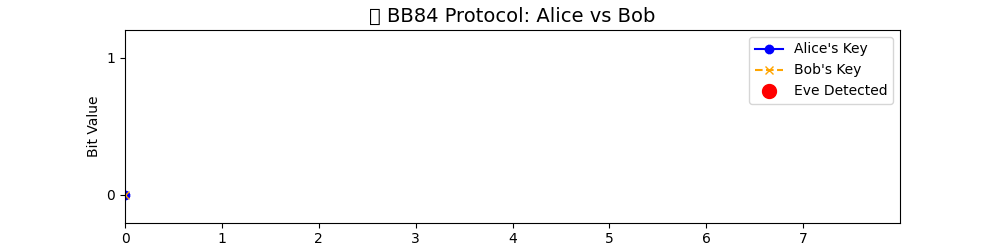

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 128272 (\N{CLOSED LOCK WITH KEY}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128272 (\N{CLOSED LOCK WITH KEY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


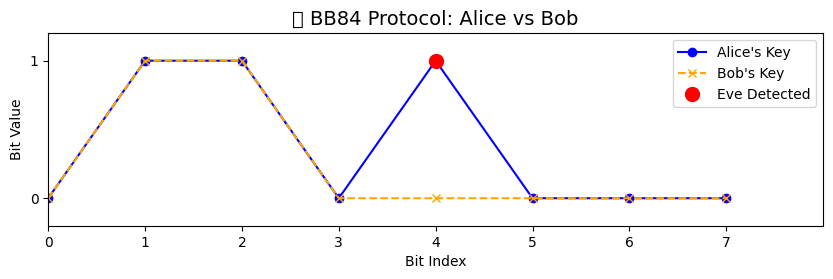

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import pennylane as qml

# Device setup
dev = qml.device("default.qubit", wires=1, shots=1)

def prepare_qubit(state, basis):
    if basis == "X":
        qml.Hadamard(wires=0)
    if state == 1:
        qml.PauliX(wires=0)

@qml.qnode(dev)
def quantum_transmission(state, basis):
    prepare_qubit(state, basis)
    if basis == "X":
        qml.Hadamard(wires=0)
    return qml.expval(qml.PauliZ(0))

# Simulation
num_bits = 10
alice_bits = np.random.randint(2, size=num_bits)
alice_bases = np.random.choice(["X", "Z"], size=num_bits)
bob_bases = np.random.choice(["X", "Z"], size=num_bits)

bob_results = np.array([
    int((1 - quantum_transmission(alice_bits[i], alice_bases[i])) / 2)
    for i in range(num_bits)
])

matching_indices = np.where(alice_bases == bob_bases)[0]
alice_key = alice_bits[matching_indices]
bob_key = bob_results[matching_indices]

# Detect eavesdropping
mismatch = alice_key != bob_key

# Animation Setup
fig, ax = plt.subplots(figsize=(10, 2.5))
ax.set_xlim(0, len(alice_key))
ax.set_ylim(-0.2, 1.2)
ax.set_xticks(range(len(alice_key)))
ax.set_yticks([0, 1])
ax.set_xlabel("Bit Index")
ax.set_ylabel("Bit Value")
ax.set_title("🔐 BB84 Protocol: Alice vs Bob", fontsize=14)

alice_line, = ax.plot([], [], 'o-b', label="Alice's Key")
bob_line,   = ax.plot([], [], linestyle='--', marker='x', color='orange', label="Bob's Key")
eve_dots,   = ax.plot([], [], 'ro', markersize=10, label="Eve Detected")
ax.legend(loc="upper right")

def update(frame):
    x_vals = list(range(frame + 1))
    alice_line.set_data(x_vals, alice_key[:frame+1])
    bob_line.set_data(x_vals, bob_key[:frame+1])

    eve_x = [i for i in x_vals if mismatch[i]]
    eve_y = [alice_key[i] for i in eve_x]
    eve_dots.set_data(eve_x, eve_y)

    return alice_line, bob_line, eve_dots

ani = animation.FuncAnimation(fig, update, frames=len(alice_key), interval=500, blit=True)

# Save as GIF
gif_filename = "bb84_key_exchange.gif"
ani.save(gif_filename, writer=PillowWriter(fps=2))

# Display GIF
display(Image(gif_filename))

# Download link for Colab
files.download(gif_filename)